# Poisson Regression

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import shap
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from sklearn.linear_model import PoissonRegressor

from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [3]:
start = time.time()

# 1. Train the model

In [4]:
df = pd.read_csv("competition_awards_data.csv",  sep = ',', header = 0)

In [5]:
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [6]:
df.shape

(200, 2)

In [7]:
df.isna().sum()

Awards        0
Math Score    0
dtype: int64

In [8]:
train, test = train_test_split(df, train_size = 0.8, random_state = 1)

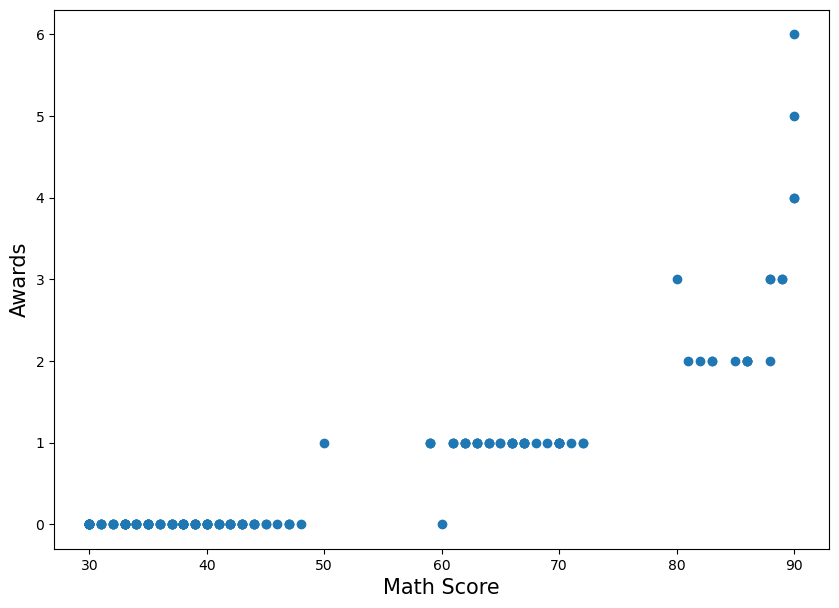

In [9]:
plt.figure(figsize = (10, 7))

plt.scatter(train['Math Score'], train['Awards'])

plt.xlabel('Math Score', fontsize = 15)
plt.ylabel('Awards', fontsize = 15)

plt.show()

In [10]:
X_train = train[['Math Score']].copy()
X_test = test[['Math Score']].copy()

y_train = train['Awards'].copy()
y_test = test['Awards'].copy()

In [11]:
clf = PoissonRegressor()

In [12]:
clf = clf.fit(X_train, y_train)

In [13]:
train['lambda'] = clf.predict(train[['Math Score']])
test['lambda'] = clf.predict(test[['Math Score']])

# 2. See the predictions

### i. Train

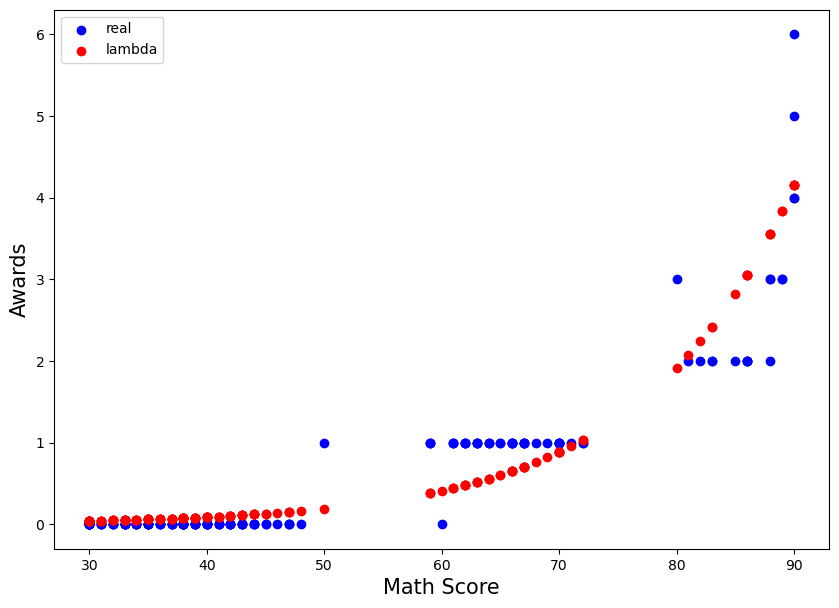

In [14]:
plt.figure(figsize = (10, 7))

plt.scatter(train['Math Score'], train['Awards'], color = 'blue', label = 'real')
plt.scatter(train['Math Score'], train['lambda'], color = 'red', label = 'lambda')

plt.xlabel('Math Score', fontsize = 15)
plt.ylabel('Awards', fontsize = 15)

plt.legend()
plt.show()

### ii. Test

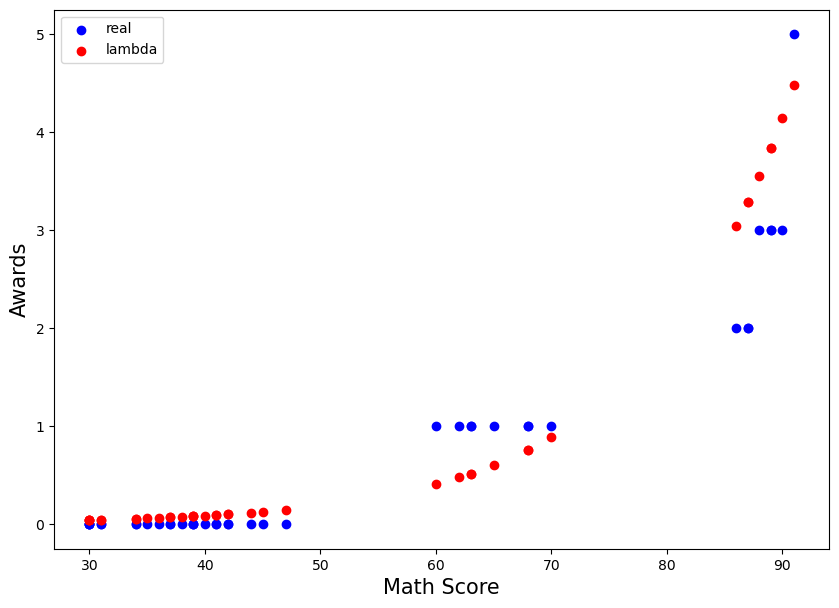

In [15]:
plt.figure(figsize = (10, 7))

plt.scatter(test['Math Score'], test['Awards'], color = 'blue', label = 'real')
plt.scatter(test['Math Score'], test['lambda'], color = 'red', label = 'lambda')

plt.xlabel('Math Score', fontsize = 15)
plt.ylabel('Awards', fontsize = 15)

plt.legend()
plt.show()

# 3. See the proabbilities for each case

$ \mathbb{P}(Y = k) = \cfrac{e^{-\lambda} \cdot \lambda^{k}}{k!} $

In [16]:
import math

In [17]:
def transform_prob(k, lambda_i):

    prob = (math.exp(-lambda_i))*(lambda_i**k)
    prob = prob/math.factorial(k)
    
    prob = round(prob*100, 2)

    return prob

In [18]:
prob_cols = [f'prob_{i}' for i in range(0, 10 + 1)]

In [19]:
for i in range(0, 10 + 1):
    train[f'prob_{i}'] = train['lambda'].map(lambda x: transform_prob(i, x))

train['sum_prob'] = train[prob_cols].sum(axis = 1)
train['max_prob'] = train[prob_cols].max(axis = 1)

In [20]:
for i in range(0, 10 + 1):
    test[f'prob_{i}'] = test['lambda'].map(lambda x: transform_prob(i, x))

test['sum_prob'] = test[prob_cols].sum(axis = 1)
test['max_prob'] = test[prob_cols].max(axis = 1)

### i. Train

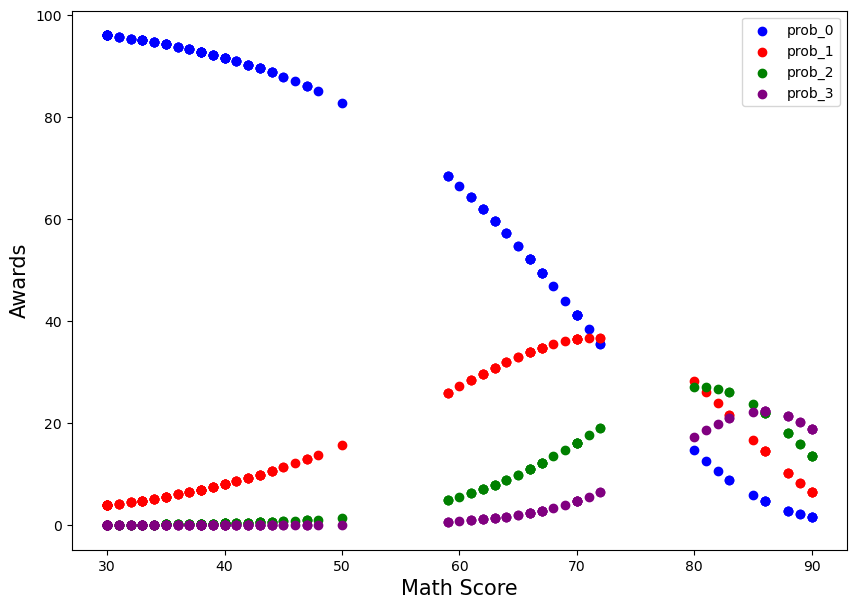

In [21]:
plt.figure(figsize = (10, 7))

plt.scatter(train['Math Score'], train['prob_0'], color = 'blue', label = 'prob_0')
plt.scatter(train['Math Score'], train['prob_1'], color = 'red', label = 'prob_1')
plt.scatter(train['Math Score'], train['prob_2'], color = 'green', label = 'prob_2')
plt.scatter(train['Math Score'], train['prob_3'], color = 'purple', label = 'prob_3')

plt.xlabel('Math Score', fontsize = 15)
plt.ylabel('Awards', fontsize = 15)

plt.legend()
plt.show()

### ii. Test

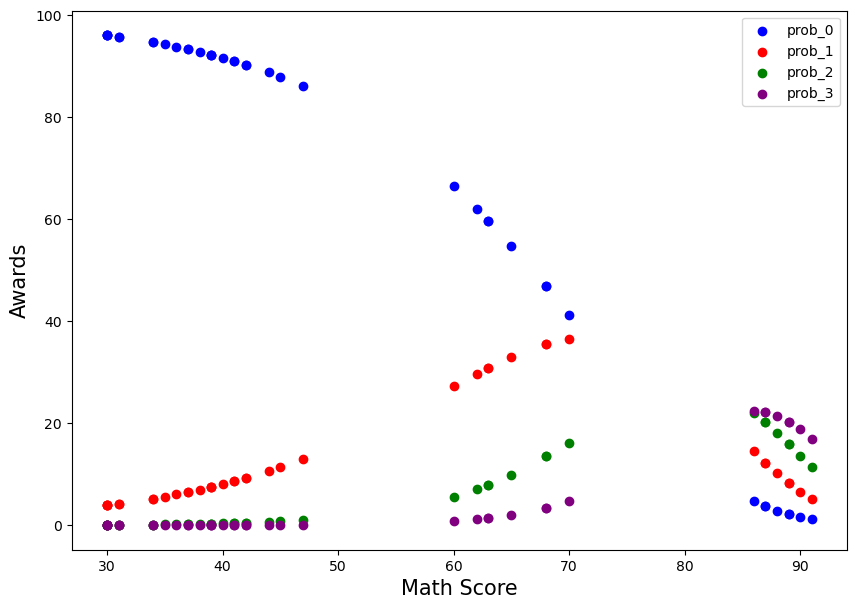

In [22]:
plt.figure(figsize = (10, 7))

plt.scatter(test['Math Score'], test['prob_0'], color = 'blue', label = 'prob_0')
plt.scatter(test['Math Score'], test['prob_1'], color = 'red', label = 'prob_1')
plt.scatter(test['Math Score'], test['prob_2'], color = 'green', label = 'prob_2')
plt.scatter(test['Math Score'], test['prob_3'], color = 'purple', label = 'prob_3')

plt.xlabel('Math Score', fontsize = 15)
plt.ylabel('Awards', fontsize = 15)

plt.legend()
plt.show()

### Time of execution

In [23]:
end = time.time()

In [24]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
